In [1]:
#data analysis, data manipulation
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
dfTrain = pd.read_csv('train.csv')
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dfTrain.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#statistics summary
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f487be44080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4879d4f080>]], dtype=object)

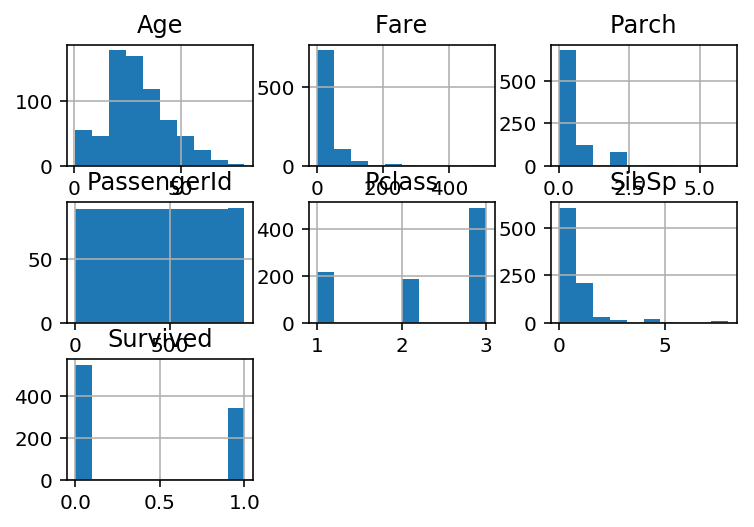

In [5]:
dfTrain.hist()

In [6]:
dfTest = pd.read_csv('test.csv')
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
dfTest.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
dfTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
dfTest['Pclass'].shape

(418,)

In [10]:
combine = [dfTrain,dfTest]

In [11]:
dfTest['Pclass'].shape

(418,)

In [12]:
dfTrain['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
dfTrain['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
dfTrain['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#cleaning up and analysing training dataset
del dfTrain['PassengerId']
del dfTest['PassengerId']
combine = [dfTrain,dfTest]

In [16]:
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
dfTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
dfTrain['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [19]:
del dfTrain['Ticket']
del dfTest['Ticket']
combine = [dfTrain, dfTest]

In [20]:
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [21]:
dfTrain.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,NaN,Q


In [22]:
dfTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [23]:
dfTest.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S
417,3,"Peter, Master. Michael J",male,NaN,1,1,22.3583,NaN,C


In [24]:
new_pclass_train = pd.Categorical(dfTrain['Pclass'],ordered=True)
new_pclass_train = new_pclass_train.rename_categories(['Class1','Class2','Class3'])
new_pclass_train.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [25]:
dfTrain['Pclass'] = new_pclass_train
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [26]:
new_pclass_test = pd.Categorical(dfTest['Pclass'],ordered=True)
new_pclass_test = new_pclass_test.rename_categories(['Class1','Class2','Class3'])
new_pclass_test.describe()

,counts,freqs
categories,,
Class1,107,0.255981
Class2,93,0.222488
Class3,218,0.521531


In [27]:
dfTest['Pclass'] = new_pclass_test
dfTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Class3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,Class2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,Class3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [28]:
dfTrain['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [29]:
dfTrain['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [30]:
char_cabin = dfTrain['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe
#too many null values, not good, will drop at the end of this notebook

<bound method Categorical.describe of [n, C, n, C, n, ..., n, B, n, C, n]
Length: 891
Categories (9, object): [A, B, C, D, ..., F, G, T, n]>

In [31]:
dfTrain['Cabin'] = new_cabin
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


In [32]:
dfTrain.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin       False
Embarked     True
dtype: bool

In [33]:
dfTrain['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

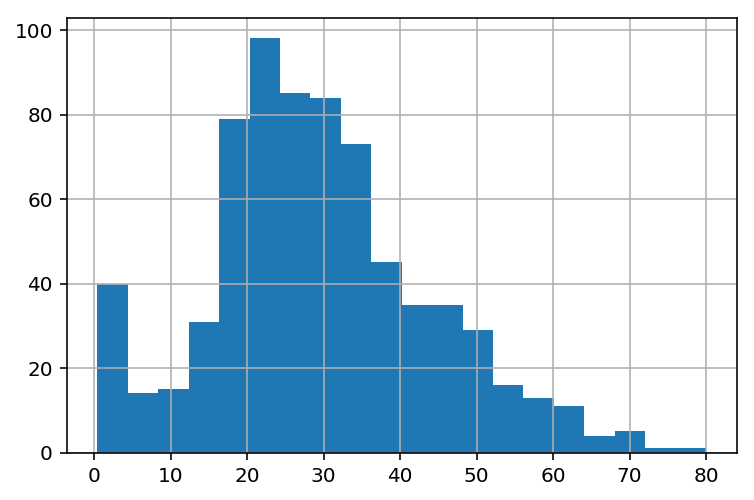

In [34]:
dfTrain['Age'].hist(bins=20)

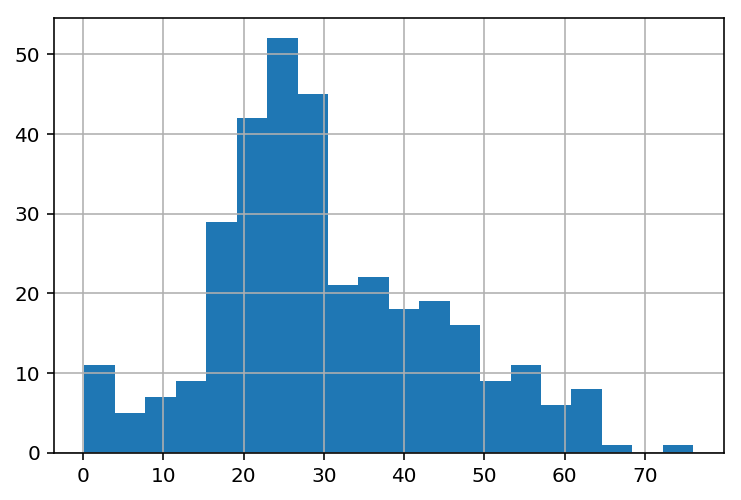

In [35]:
#new_age_var = np.where(dfTrain['Age'].isnull(),28,dfTrain['Age'])
#dfTrain['Age'] = new_age_var
#dfTrain['Age'].describe()
dfTest['Age'].hist(bins=20)

In [36]:
dfTrain['Family'] = dfTrain['Parch'] + dfTrain['SibSp']
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,0


In [37]:
dfTest['Family'] = dfTest['Parch'] + dfTest['SibSp']
dfTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,Class3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,0
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,1
2,Class2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,0
3,Class3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,0
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,2


In [38]:
combine = [dfTrain,dfTest]

In [39]:
dfTest['Pclass'].shape

(418,)

In [40]:
survived_sex = pd.crosstab(index=dfTrain['Survived'],columns=dfTrain['Sex'])
survived_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [41]:
survived_pclass = pd.crosstab(index=dfTrain['Survived'],columns=dfTrain['Pclass'])
survived_pclass

Pclass,Class1,Class2,Class3
Survived,,,
0,80,97,372
1,136,87,119


In [42]:
survived_family = pd.crosstab(index=dfTrain['Survived'],columns=dfTrain['Family'])
survived_family

Family,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [43]:
survived_embarked = pd.crosstab(index=dfTrain['Survived'],columns=dfTrain['Embarked'])
survived_embarked

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [44]:
survived_cabin = pd.crosstab(index=dfTrain['Survived'],columns=dfTrain['Cabin'])
survived_cabin

Cabin,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [45]:
dfTrain.dtypes

Survived       int64
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin       category
Embarked      object
Family         int64
dtype: object

In [46]:
dfTrain['Sex'] = dfTrain['Sex'].map({'female':1,'male':0}).astype(int)

In [47]:
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,Class3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,n,S,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,n,S,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C,S,1
4,0,Class3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,n,S,0


In [48]:
dfTest['Sex'].isnull().any()

False

In [49]:
dfTest['Sex'] = dfTest['Sex'].map({'female':1,'male':0}).astype(int)
dfTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,Class3,"Kelly, Mr. James",0,34.5,0,0,7.8292,NaN,Q,0
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,NaN,S,1
2,Class2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,NaN,Q,0
3,Class3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,NaN,S,0
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,NaN,S,2


In [50]:
combine = [dfTrain,dfTest]

In [51]:
dfTest['Pclass'].shape

(418,)

In [52]:
dfTrain['HasFamily'] = 1
dfTrain.loc[dfTrain['Family']==0,'HasFamily'] = 0
dfTrain[['HasFamily','Survived']].groupby(['HasFamily'],as_index=False).mean()

,HasFamily,Survived
0,0,0.303538
1,1,0.505650


In [53]:
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,HasFamily
0,0,Class3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,n,S,1,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,C,1,1
2,1,Class3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,n,S,0,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C,S,1,1
4,0,Class3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,n,S,0,0


In [54]:
dfTest['HasFamily'] = 1
dfTest.loc[dfTest['Family']==0,'HasFamily'] = 0

In [55]:
dfTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,HasFamily
0,Class3,"Kelly, Mr. James",0,34.5,0,0,7.8292,NaN,Q,0,0
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,NaN,S,1,1
2,Class2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,NaN,Q,0,0
3,Class3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,NaN,S,0,0
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,NaN,S,2,1


In [56]:
dfTrain = dfTrain.drop(['Parch','SibSp','Family'],axis=1)
#ValueError ['Parch' 'SibSp' Family'] not contained in axis
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily
0,0,Class3,"Braund, Mr. Owen Harris",0,22.0,7.2500,n,S,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",1,26.0,7.9250,n,S,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C,S,1
4,0,Class3,"Allen, Mr. William Henry",0,35.0,8.0500,n,S,0


In [57]:
#dfTest = dfTest.drop(['Parch','SibSp','Family'],axis=1)
del dfTest['Parch']
del dfTest['SibSp']
del dfTest['Family']
dfTest.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily
0,Class3,"Kelly, Mr. James",0,34.5,7.8292,NaN,Q,0
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,NaN,S,1
2,Class2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,NaN,Q,0
3,Class3,"Wirz, Mr. Albert",0,27.0,8.6625,NaN,S,0
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,NaN,S,1


In [58]:
combine = [dfTrain,dfTest]

In [59]:
dfTest['Pclass'].shape

(418,)

In [60]:
#title
dfTrain['Title'] = dfTrain.Name.str.extract('([A-Za-z]+)\.',expand=False)
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,Class3,"Braund, Mr. Owen Harris",0,22.0,7.2500,n,S,1,Mr
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,C,1,Mrs
2,1,Class3,"Heikkinen, Miss. Laina",1,26.0,7.9250,n,S,0,Miss
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C,S,1,Mrs
4,0,Class3,"Allen, Mr. William Henry",0,35.0,8.0500,n,S,0,Mr


In [61]:
dfTrain['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [62]:
dfTrain['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [63]:
pd.crosstab(dfTrain['Title'],dfTrain['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [64]:
dfTrain['Title'] = dfTrain['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
dfTrain['Title'] = dfTrain['Title'].replace(['Mlle','Ms'],'Miss')
dfTrain['Title'] = dfTrain['Title'].replace(['Mme'],'Mrs')
pd.crosstab(dfTrain['Title'],dfTrain['Sex'])

Sex,0,1
Title,,
Master,40,0
Miss,0,185
Mr,517,0
Mrs,0,126
Rare,20,3


In [65]:
dfTrain[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [66]:
dfTrain['Title'].isnull().any()

False

In [67]:
title_mapping = {'Mr':0, 'Rare':1, 'Master':2, 'Miss':3, 'Mrs':4}
dfTrain['Title'] = dfTrain['Title'].map(title_mapping)
dfTrain.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,Class3,"Braund, Mr. Owen Harris",0,22.0,7.2500,n,S,1,0
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,C,1,4
2,1,Class3,"Heikkinen, Miss. Laina",1,26.0,7.9250,n,S,0,3
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C,S,1,4
4,0,Class3,"Allen, Mr. William Henry",0,35.0,8.0500,n,S,0,0


In [68]:
dfTest['Title'] = dfTest.Name.str.extract('([A-Za-z]+)\.',expand=False)
dfTest.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,Class3,"Kelly, Mr. James",0,34.5,7.8292,NaN,Q,0,Mr
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,NaN,S,1,Mrs
2,Class2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,NaN,Q,0,Mr
3,Class3,"Wirz, Mr. Albert",0,27.0,8.6625,NaN,S,0,Mr
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,NaN,S,1,Mrs


In [69]:
dfTest['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'], dtype=object)

In [70]:
dfTest['Title'] = dfTest['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
dfTest['Title'] = dfTest['Title'].replace(['Mlle','Ms'],'Miss')
dfTest['Title'] = dfTest['Title'].replace(['Mme'],'Mrs')
pd.crosstab(dfTest['Title'],dfTest['Sex'])

Sex,0,1
Title,,
Master,21,0
Miss,0,79
Mr,240,0
Mrs,0,72
Rare,5,1


In [71]:
dfTest['Title'] = dfTest['Title'].map({'Mr':0, 'Rare':1, 'Master':2, 'Miss':3, 'Mrs':4})
dfTest.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,Class3,"Kelly, Mr. James",0,34.5,7.8292,NaN,Q,0,0
1,Class3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,NaN,S,1,4
2,Class2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,NaN,Q,0,0
3,Class3,"Wirz, Mr. Albert",0,27.0,8.6625,NaN,S,0,0
4,Class3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,NaN,S,1,4


In [72]:
combine = [dfTrain,dfTest]

In [73]:
del dfTrain['Name']
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,Class3,0,22.0,7.2500,n,S,1,0
1,1,Class1,1,38.0,71.2833,C,C,1,4
2,1,Class3,1,26.0,7.9250,n,S,0,3
3,1,Class1,1,35.0,53.1000,C,S,1,4
4,0,Class3,0,35.0,8.0500,n,S,0,0


In [74]:
del dfTest['Name']
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,Class3,0,34.5,7.8292,NaN,Q,0,0
1,Class3,1,47.0,7.0000,NaN,S,1,4
2,Class2,0,62.0,9.6875,NaN,Q,0,0
3,Class3,0,27.0,8.6625,NaN,S,0,0
4,Class3,1,22.0,12.2875,NaN,S,1,4


In [75]:
dfTrain['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

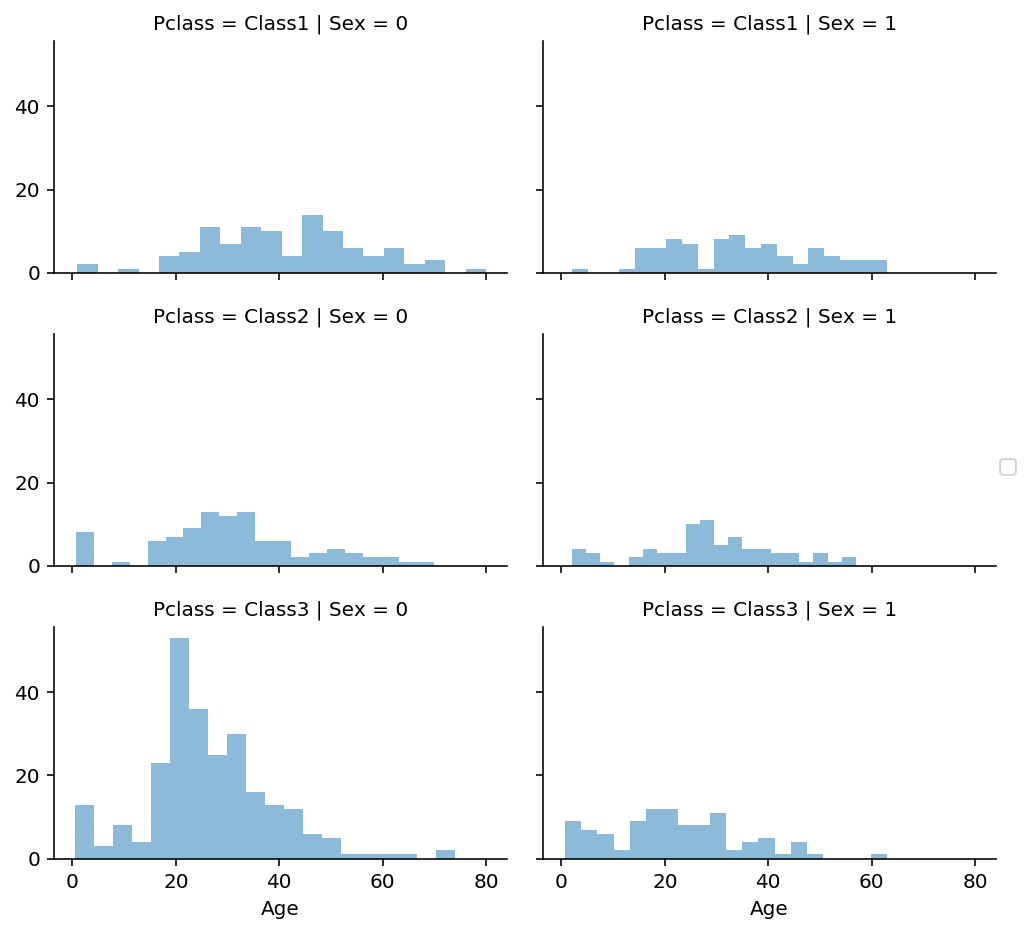

In [76]:
grid = sns.FacetGrid(dfTrain, row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [77]:
pd.crosstab(dfTrain['Survived'],dfTrain['Pclass'])

Pclass,Class1,Class2,Class3
Survived,,,
0,80,97,372
1,136,87,119


In [78]:
dfTrain['Pclass'].isnull().any()

False

In [79]:
dfTrain['Pclass'] = dfTrain['Pclass'].map({'Class3':0,'Class2':1,'Class1':2})
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,0,22.0,7.2500,n,S,1,0
1,1,2,1,38.0,71.2833,C,C,1,4
2,1,0,1,26.0,7.9250,n,S,0,3
3,1,2,1,35.0,53.1000,C,S,1,4
4,0,0,0,35.0,8.0500,n,S,0,0


In [80]:
dfTest['Pclass'].dtypes

CategoricalDtype(categories=['Class1', 'Class2', 'Class3'], ordered=True)

In [81]:
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,Class3,0,34.5,7.8292,NaN,Q,0,0
1,Class3,1,47.0,7.0000,NaN,S,1,4
2,Class2,0,62.0,9.6875,NaN,Q,0,0
3,Class3,0,27.0,8.6625,NaN,S,0,0
4,Class3,1,22.0,12.2875,NaN,S,1,4


In [82]:
dfTest['Pclass'].unique()

[Class3, Class2, Class1]
Categories (3, object): [Class1 < Class2 < Class3]

In [83]:
dfTest.shape

(418, 8)

In [84]:
dfTest['Pclass'].shape

(418,)

In [85]:
dfTest['Pclass'].isnull().any()

False

In [86]:
dfTest['Pclass'] = dfTest['Pclass'].map({'Class3':0,'Class2':1,'Class1':2})
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,34.5,7.8292,NaN,Q,0,0
1,0,1,47.0,7.0000,NaN,S,1,4
2,1,0,62.0,9.6875,NaN,Q,0,0
3,0,0,27.0,8.6625,NaN,S,0,0
4,0,1,22.0,12.2875,NaN,S,1,4


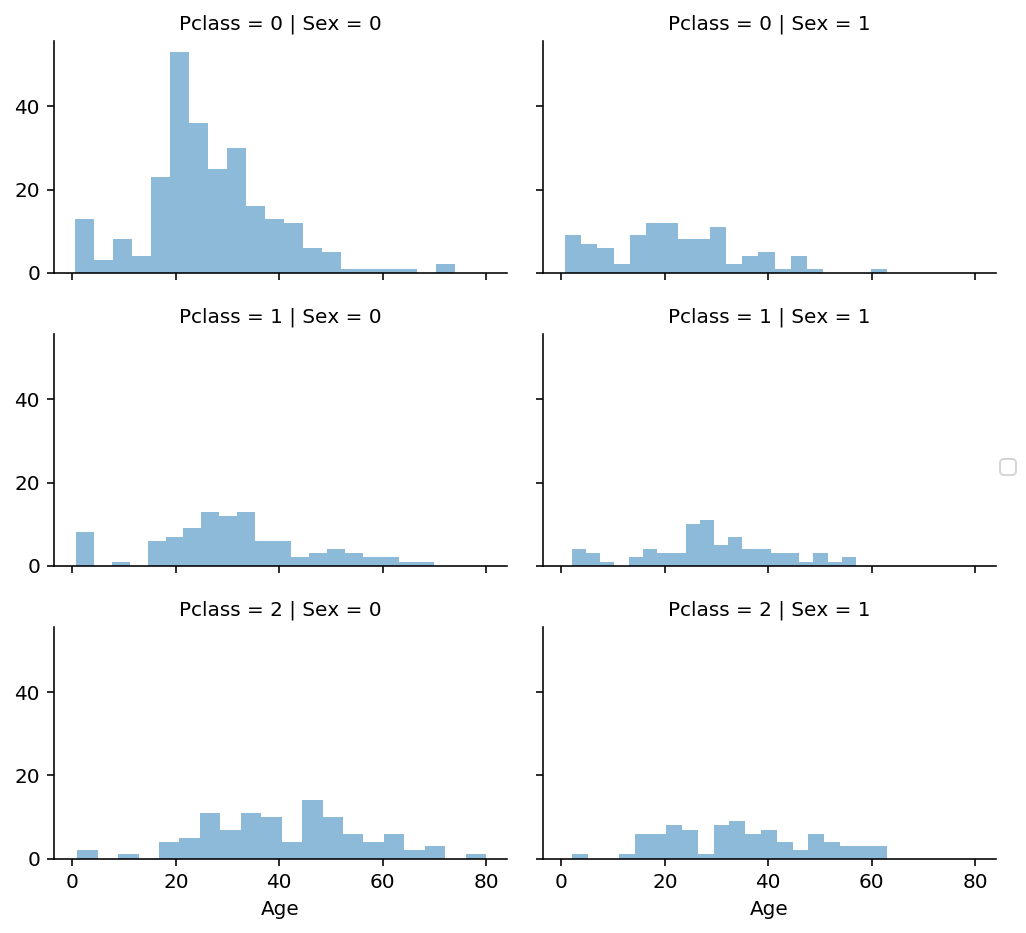

In [87]:
grid = sns.FacetGrid(dfTrain, row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [88]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [89]:
for i in range(0,2):
    for j in range(0,3):
        guess_df = dfTrain[(dfTrain['Sex']==i) & (dfTrain['Pclass']==j)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5

for i in range(0,2):
    for j in range(0,3):
        dfTrain.loc[(dfTrain.Age.isnull()) & (dfTrain.Sex == i) & (dfTrain.Pclass == j), 'Age'] = guess_ages[i,j]

dfTrain['Age'] = dfTrain['Age'].astype(int)
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,0,22,7.2500,n,S,1,0
1,1,2,1,38,71.2833,C,C,1,4
2,1,0,1,26,7.9250,n,S,0,3
3,1,2,1,35,53.1000,C,S,1,4
4,0,0,0,35,8.0500,n,S,0,0


In [90]:
dfTrain['Age'].describe()

count    891.000000
mean      29.072952
std       13.326339
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

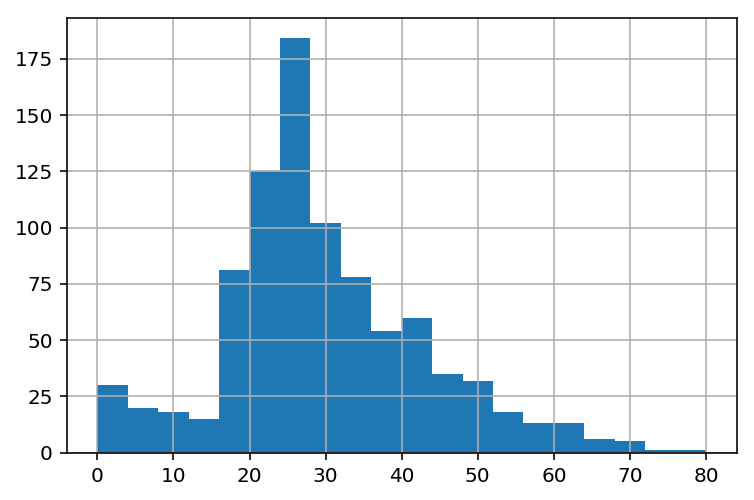

In [91]:
dfTrain['Age'].hist(bins=20)

In [92]:
dfTest['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

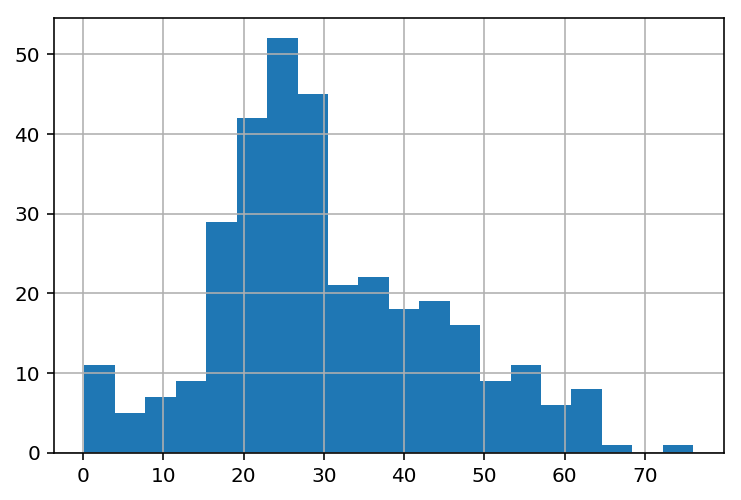

In [93]:
dfTest['Age'].hist(bins=20)

In [94]:
dfTest['Age'].isnull().any()

True

In [95]:
guess_ages_test = np.zeros((2,3))
guess_ages_test

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [96]:
for i in range(0,2):
    for j in range(0,3):
        guess_df = dfTest[(dfTest['Sex']==i) & (dfTest['Pclass']==j)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages_test[i,j] = int(age_guess/0.5 + 0.5)*0.5

for i in range(0,2):
    for j in range(0,3):
        dfTest.loc[(dfTest.Age.isnull()) & (dfTest.Sex == i) & (dfTest.Pclass == j), 'Age'] = guess_ages_test[i,j]

dfTest['Age'] = dfTest['Age'].astype(int)
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,34,7.8292,NaN,Q,0,0
1,0,1,47,7.0000,NaN,S,1,4
2,1,0,62,9.6875,NaN,Q,0,0
3,0,0,27,8.6625,NaN,S,0,0
4,0,1,22,12.2875,NaN,S,1,4


In [97]:
dfTest['Age'].describe()

count    418.000000
mean      29.272727
std       13.055582
min        0.000000
25%       22.000000
50%       25.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

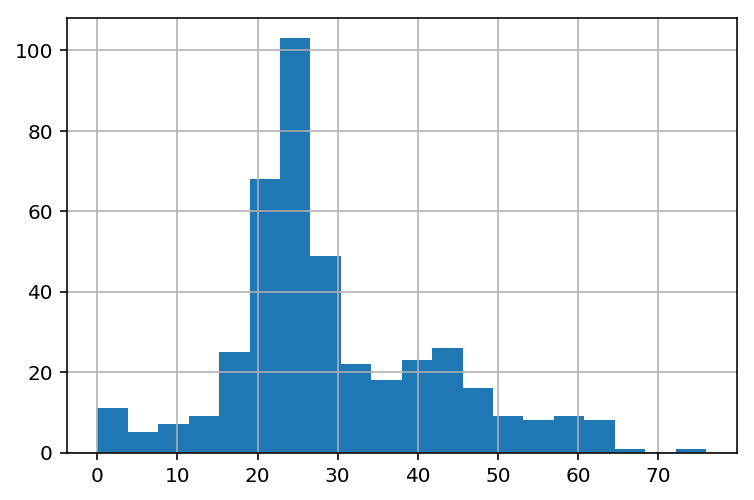

In [98]:
dfTest['Age'].hist(bins=20)

In [99]:
dfTrain['AgeBand'] = pd.cut(dfTrain['Age'],5)
dfTrain[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [100]:
dfTrain.loc[(dfTrain['Age'] <= 16),'Age'] = 4
dfTrain.loc[(dfTrain['Age'] > 48) & (dfTrain['Age'] <= 64),'Age'] = 3
dfTrain.loc[(dfTrain['Age'] > 32) & (dfTrain['Age'] <= 48),'Age'] = 2
dfTrain.loc[(dfTrain['Age'] > 16) & (dfTrain['Age'] <= 32),'Age'] = 1
dfTrain.loc[(dfTrain['Age'] > 64),'Age'] = 0
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title,AgeBand
0,0,0,0,1,7.2500,n,S,1,0,"(16.0, 32.0]"
1,1,2,1,2,71.2833,C,C,1,4,"(32.0, 48.0]"
2,1,0,1,1,7.9250,n,S,0,3,"(16.0, 32.0]"
3,1,2,1,2,53.1000,C,S,1,4,"(32.0, 48.0]"
4,0,0,0,2,8.0500,n,S,0,0,"(32.0, 48.0]"


In [101]:
del dfTrain['AgeBand']
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,0,1,7.2500,n,S,1,0
1,1,2,1,2,71.2833,C,C,1,4
2,1,0,1,1,7.9250,n,S,0,3
3,1,2,1,2,53.1000,C,S,1,4
4,0,0,0,2,8.0500,n,S,0,0


In [102]:
dfTest.loc[(dfTest['Age'] <= 16),'Age'] = 4
dfTest.loc[(dfTest['Age'] > 48) & (dfTest['Age'] <= 64),'Age'] = 3
dfTest.loc[(dfTest['Age'] > 32) & (dfTest['Age'] <= 48),'Age'] = 2
dfTest.loc[(dfTest['Age'] > 16) & (dfTest['Age'] <= 32),'Age'] = 1
dfTest.loc[(dfTest['Age'] > 64),'Age'] = 0
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,2,7.8292,NaN,Q,0,0
1,0,1,2,7.0000,NaN,S,1,4
2,1,0,3,9.6875,NaN,Q,0,0
3,0,0,1,8.6625,NaN,S,0,0
4,0,1,1,12.2875,NaN,S,1,4


In [103]:
combine = [dfTrain, dfTest]

In [104]:
dfTrain['Fare'].isnull().any()
#there is no null values

False

In [105]:
dfTrain['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

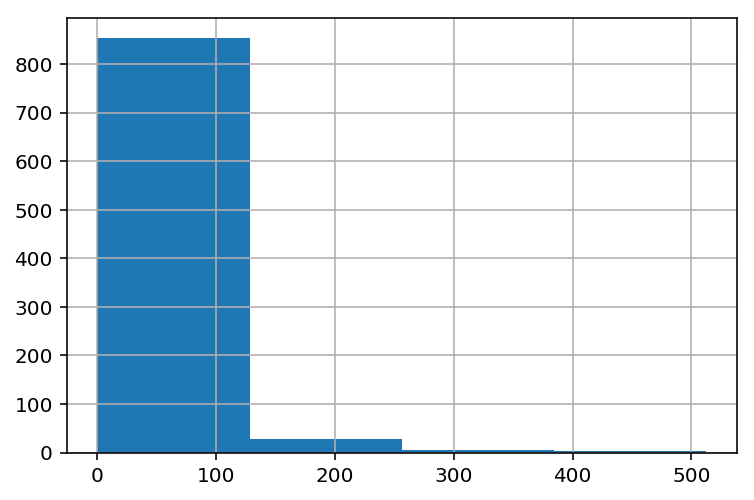

In [106]:
dfTrain['Fare'].hist(bins=4)

In [107]:
dfTrain['FareBand'] = pd.cut(dfTrain['Fare'],4)
dfTrain[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [108]:
dfTrain['Fare'] = dfTrain['Fare'].astype(int)
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title,FareBand
0,0,0,0,1,7,n,S,1,0,"(-0.512, 128.082]"
1,1,2,1,2,71,C,C,1,4,"(-0.512, 128.082]"
2,1,0,1,1,7,n,S,0,3,"(-0.512, 128.082]"
3,1,2,1,2,53,C,S,1,4,"(-0.512, 128.082]"
4,0,0,0,2,8,n,S,0,0,"(-0.512, 128.082]"


In [109]:
pd.crosstab(dfTrain['FareBand'],dfTrain['Survived'])

Survived,0,1
FareBand,,
"(-0.512, 128.082]",539,314
"(128.082, 256.165]",8,21
"(256.165, 384.247]",2,4
"(384.247, 512.329]",0,3


In [110]:
dfTrain.loc[(dfTrain['Fare'] <= 128.082),'Fare'] = 0
dfTrain.loc[(dfTrain['Fare'] > 128.082) & (dfTrain['Fare'] <= 256.165),'Fare'] = 2
dfTrain.loc[(dfTrain['Fare'] > 256.165) & (dfTrain['Fare'] <= 384.247),'Fare'] = 1
dfTrain.loc[(dfTrain['Fare'] > 384.247),'Fare'] = 3
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title,FareBand
0,0,0,0,1,0,n,S,1,0,"(-0.512, 128.082]"
1,1,2,1,2,0,C,C,1,4,"(-0.512, 128.082]"
2,1,0,1,1,0,n,S,0,3,"(-0.512, 128.082]"
3,1,2,1,2,0,C,S,1,4,"(-0.512, 128.082]"
4,0,0,0,2,0,n,S,0,0,"(-0.512, 128.082]"


In [111]:
del dfTrain['FareBand']
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,0,1,0,n,S,1,0
1,1,2,1,2,0,C,C,1,4
2,1,0,1,1,0,n,S,0,3
3,1,2,1,2,0,C,S,1,4
4,0,0,0,2,0,n,S,0,0


In [112]:
dfTest['Fare'].isnull().sum()

1

In [113]:
freq_fare = dfTest.Fare.dropna().mode()[0]
freq_fare

7.75

In [114]:
dfTest['Fare'] = dfTest.Fare.fillna(freq_fare)
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,2,7.8292,NaN,Q,0,0
1,0,1,2,7.0000,NaN,S,1,4
2,1,0,3,9.6875,NaN,Q,0,0
3,0,0,1,8.6625,NaN,S,0,0
4,0,1,1,12.2875,NaN,S,1,4


In [115]:
dfTest['Fare'].isnull().sum()

0

In [116]:
dfTest['Fare'] = dfTest['Fare'].astype(int)
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,2,7,NaN,Q,0,0
1,0,1,2,7,NaN,S,1,4
2,1,0,3,9,NaN,Q,0,0
3,0,0,1,8,NaN,S,0,0
4,0,1,1,12,NaN,S,1,4


In [117]:
dfTest.loc[(dfTest['Fare'] <= 128.082),'Fare'] = 0
dfTest.loc[(dfTest['Fare'] > 128.082) & (dfTest['Fare'] <= 256.165),'Fare'] = 2
dfTest.loc[(dfTest['Fare'] > 256.165) & (dfTest['Fare'] <= 384.247),'Fare'] = 1
dfTest.loc[(dfTest['Fare'] > 384.247),'Fare'] = 3
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,2,0,NaN,Q,0,0
1,0,1,2,0,NaN,S,1,4
2,1,0,3,0,NaN,Q,0,0
3,0,0,1,0,NaN,S,0,0
4,0,1,1,0,NaN,S,1,4


In [118]:
combine = [dfTrain, dfTest]

In [119]:
pd.crosstab(dfTrain['Embarked'],dfTrain['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [120]:
dfTrain['Embarked'].isnull().any()

True

In [121]:
dfTrain['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [122]:
dfTrain['Embarked'].dtypes

dtype('O')

In [123]:
dfTrain['Embarked'].isnull().sum()

2

In [124]:
freq_port = dfTrain.Embarked.dropna().mode()[0]
freq_port

'S'

In [125]:
dfTrain['Embarked'] = dfTrain['Embarked'].fillna(freq_port)

In [126]:
embarked_mapping = {'S':0,'Q':1,'C':2}
dfTrain['Embarked'] = dfTrain['Embarked'].map(embarked_mapping)
dfTrain['Embarked'] = dfTrain['Embarked'].astype(int)
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,0,1,0,n,0,1,0
1,1,2,1,2,0,C,2,1,4
2,1,0,1,1,0,n,0,0,3
3,1,2,1,2,0,C,0,1,4
4,0,0,0,2,0,n,0,0,0


In [127]:
dfTest['Embarked'].isnull().sum()

0

In [128]:
dfTest['Embarked'] = dfTest['Embarked'].fillna(freq_port)

In [129]:
dfTest['Embarked'] = dfTest['Embarked'].map({'S':0,'Q':1,'C':2})
dfTest['Embarked'] = dfTest['Embarked'].astype(int)
dfTest.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,HasFamily,Title
0,0,0,2,0,NaN,1,0,0
1,0,1,2,0,NaN,0,1,4
2,1,0,3,0,NaN,1,0,0
3,0,0,1,0,NaN,0,0,0
4,0,1,1,0,NaN,0,1,4


In [130]:
combine = [dfTrain,dfTest]

In [131]:
pd.crosstab(dfTrain['Cabin'],dfTrain['Survived'])

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
n,481,206


In [132]:
dfTrain['Cabin'].describe()

count     891
unique      9
top         n
freq      687
Name: Cabin, dtype: object

In [133]:
dfTrain = dfTrain.drop(['Cabin'],axis=1)
dfTrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasFamily,Title
0,0,0,0,1,0,0,1,0
1,1,2,1,2,0,2,1,4
2,1,0,1,1,0,0,0,3
3,1,2,1,2,0,0,1,4
4,0,0,0,2,0,0,0,0


In [134]:
dfTest = dfTest.drop(['Cabin'],axis=1)
dfTest.head()

,Pclass,Sex,Age,Fare,Embarked,HasFamily,Title
0,0,0,2,0,1,0,0
1,0,1,2,0,0,1,4
2,1,0,3,0,1,0,0
3,0,0,1,0,0,0,0
4,0,1,1,0,0,1,4


In [143]:
dfTrainX = dfTrain.drop(['Survived'],axis=1)
dfTrainY = dfTrain['Survived']
dfTestX = dfTest.copy()
dfTrainX.shape,dfTrainY.shape,dfTestX.shape

((891, 7), (891,), (418, 7))

In [144]:
#Logistics Regression
logreg = LogisticRegression()
logreg.fit(dfTrainX,dfTrainY)
dfTest_PredictY = logreg.predict(dfTestX)
acc_log = round(logreg.score(dfTrainX,dfTrainY)*100,2)
acc_log

81.140000000000001

In [145]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

88.760000000000005

In [146]:
#Support Vector Machines
svc = SVC()
svc.fit(dfTrainX,dfTrainY)
dfTest_PredictY = svc.predict(dfTestX)
acc_log = round(svc.score(dfTrainX,dfTrainY)*100,2)
acc_log

82.939999999999998

In [147]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

100.0

In [148]:
#K-Nearest Neighbor Algorithm
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(dfTrainX, dfTrainY)
dfTest_PredictY = knn.predict(dfTestX)
acc_knn = round(knn.score(dfTrainX, dfTrainY) * 100, 2)
acc_knn

84.180000000000007

In [149]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

90.189999999999998

In [150]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(dfTrainX, dfTrainY)
dfTest_PredictY = gaussian.predict(dfTestX)
acc_gaussian = round(gaussian.score(dfTrainX, dfTrainY) * 100, 2)
acc_gaussian

78.900000000000006

In [151]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

86.840000000000003

In [152]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(dfTrainX, dfTrainY)
dfTest_PredictY = perceptron.predict(dfTestX)
acc_perceptron = round(perceptron.score(dfTrainX, dfTrainY) * 100, 2)
acc_perceptron

/ext/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.109999999999999

In [153]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

88.280000000000001

In [154]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(dfTrainX, dfTrainY)
dfTest_PredictY = linear_svc.predict(dfTestX)
acc_linear_svc = round(linear_svc.score(dfTrainX, dfTrainY) * 100, 2)
acc_linear_svc

80.019999999999996

In [155]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

89.230000000000004

In [156]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(dfTrainX, dfTrainY)
dfTest_PredictY = sgd.predict(dfTestX)
acc_sgd = round(sgd.score(dfTrainX, dfTrainY) * 100, 2)
acc_sgd

/ext/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


72.5

In [157]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

89.0

In [158]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(dfTrainX, dfTrainY)
dfTest_PredictY = decision_tree.predict(dfTestX)
acc_decision_tree = round(decision_tree.score(dfTrainX, dfTrainY) * 100, 2)
acc_decision_tree

84.739999999999995

In [159]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

95.930000000000007

In [160]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(dfTrainX, dfTrainY)
dfTest_PredictY = random_forest.predict(dfTestX)
acc_random_forest = round(random_forest.score(dfTrainX, dfTrainY) * 100, 2)
acc_random_forest

84.739999999999995

In [161]:
acc_log_test = round(svc.score(dfTestX,dfTest_PredictY)*100,2)
acc_log_test

94.019999999999996